# Movie Recommendation System #

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
plt.style.use('dark_background')
import warnings
warnings.filterwarnings(action = 'ignore')

In [65]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
ratings.head(15) 

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [66]:
data = ratings.pivot_table(index = "movieId",columns = "userId",values = "rating")
data.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
data.fillna(0,inplace=True)
data.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


# Removing noise from data # 
   Qualifying an user - more than 50 movies rated 
   Qualifying movie - more than 10 users rated

In [68]:
n_users = ratings.groupby('movieId')['rating'].agg('count')
n_movie = ratings.groupby('userId')['rating'].agg('count')

Text(0.5, 1.0, 'movieId v/s no of users')

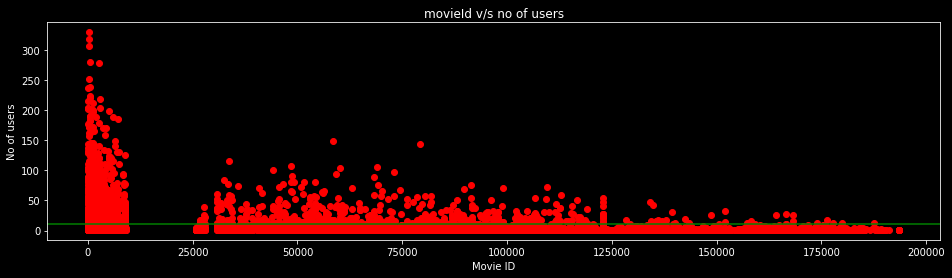

In [69]:
fig = plt.figure(figsize=(16,4))
plt.scatter(n_users.index,n_users,color = 'red')
plt.axhline(y = 10, color ='green')
plt.xlabel('Movie ID')
plt.ylabel('No of users')
plt.title('movieId v/s no of users')

In [70]:
data = data.loc[n_users[n_users>10].index,:]

Text(0.5, 1.0, 'No of movies v/s Users')

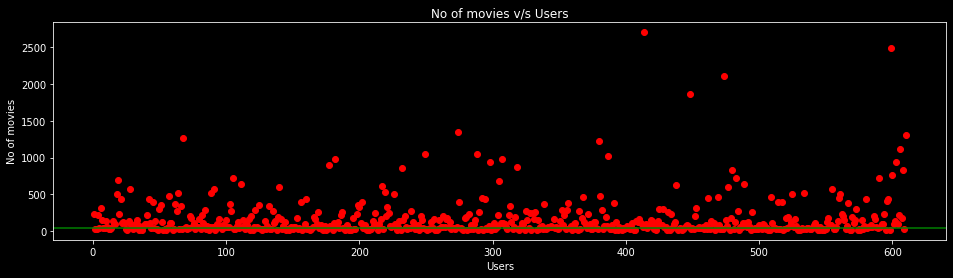

In [71]:
fig = plt.figure(figsize=(16,4))
plt.scatter(n_movie.index,n_movie,color = 'red')
plt.axhline(y = 50, color ='green')
plt.xlabel('Users')
plt.ylabel('No of movies')
plt.title('No of movies v/s Users')

In [72]:
data = data.loc[:,n_movie[n_movie>50].index]
data

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
csr_data = csr_matrix(data.values)
data.reset_index(inplace = True)

In [74]:
knn = NearestNeighbors(metric = 'cosine', n_neighbors = 20, algorithm = 'brute', n_jobs =1).fit(csr_data)

In [103]:
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = movies[movies['title'].str.contains(movie_name)]  #checking if movie is present in list
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['movieId'] #index of movie in the 'movie_list' dataframe
        movie_idx = data[data['movieId'] == movie_idx].index[0] #index of movie in modified dataframe 'data'
        #print(movie_idx)
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1) #using knn to find nearest neighbors
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1] 
        #sorted zipping
        #slicing [start:end:step]
        #print(rec_movie_indices)
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = data.iloc[val[0]]['movieId'] #takes index of current movie recommended and finds movieId in dataframe 'data'
            #print(movie_idx)
            idx = movies[movies['movieId'] == movie_idx].index #finds index of current movie in movies dataframe using previously found movieId in 'data' dataframe
            #print(movies.iloc[idx]['title'].values[0])
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})#constructing dataframe
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df
    else:
        return "No movies found. Please check your input"

In [104]:
get_movie_recommendation('Iron Man')

,Title,Distance
1,Up (2009),0.368857
2,Guardians of the Galaxy (2014),0.368758
3,Watchmen (2009),0.368558
4,Star Trek (2009),0.366029
5,Batman Begins (2005),0.362759
6,Avatar (2009),0.310893
7,Iron Man 2 (2010),0.307492
8,WALL·E (2008),0.298138
9,"Dark Knight, The (2008)",0.285835
10,"Avengers, The (2012)",0.285319
